# Create Natural Captions for Images

im2txt is a ML model that can take in images, and generate human-like captions describing the scene. Given an image, it'll output a string which will be a human-like description of what the model "sees" in the image. The model has been trained on 300k+ images. (More on performance below.)

## Check Out the IPython Tutorial Below To Get This Model Running!

# Prediction Examples:

[]() | []()
- | -
![a group of people riding bikes down a dirt road](https://i.imgur.com/lTXlzX2.png) | ![a group of people walking down a street](https://i.imgur.com/dMT4OyI.png)

## How Good Is This Model?

The performance published in the original paper shows results comparable to
human performance in certain accuracy/quality metrics. However, due to the
relatively small dataset and
[types of examples available in the training (learning) dataset](http://cocodataset.org/#explore),
the performance varies in the real world.

### Misc

The code for the model/training is licensed under
[Apache License 2.0](https://github.com/tensorflow/models/blob/master/LICENSE)
and the trained model weights is licensed under [MIT](https://github.com/KranthiGV/Pretrained-Show-and-Tell-model/blob/master/LICENSE).


This notebook is largely based off of [im2txt/run_inference.py](https://github.com/tensorflow/models/blob/master/research/im2txt/im2txt/run_inference.py)

# Download and Unzip Model Files from ModelDepot.io

In [0]:
# Shell commands to download and unzip the models
!wget https://modeldepot.io/assets/uploads/models/models/3e814cec-19dd-4dff-aa5b-fa46864f25e4_model.zip -O im2txt_model.zip
!unzip im2txt_model.zip

## Download Model Code From TF Repo

In [0]:
# Grab the source model code from Github
!git clone --depth 1 https://github.com/tensorflow/models.git
# Move up im2txt modules to our current directory
!mv models/research/im2txt/im2txt im2txt

## Install Dependencies
Feel free to skip if you already have these dependencies installed

In [0]:
# Execute pip as a shell command
!pip install tensorflow matplotlib image

## Set Model Files
**TODO** Change these values if you're downloading the model files somewhere else.

In [0]:
# TODO: Change these values to where your model files are

checkpoint_path = 'model/model.ckpt-2000000'
vocab_file = 'model/word_counts.txt'

## Download and Visualize Some Sample Images

In [0]:
# Shell commands to download example images
!wget https://cdn.pixabay.com/photo/2014/09/07/21/52/urban-438393_960_720.jpg -O urban.jpg
!wget https://cdn.pixabay.com/photo/2018/01/28/19/13/the-plane-3114468_960_720.jpg -O plane.jpg
!wget https://cdn.pixabay.com/photo/2018/01/28/19/00/electric-locomotive-3114443_960_720.jpg -O train.jpg
!wget https://cdn.pixabay.com/photo/2016/01/25/15/33/bicycling-1160860_960_720.jpg -O bikes.jpg

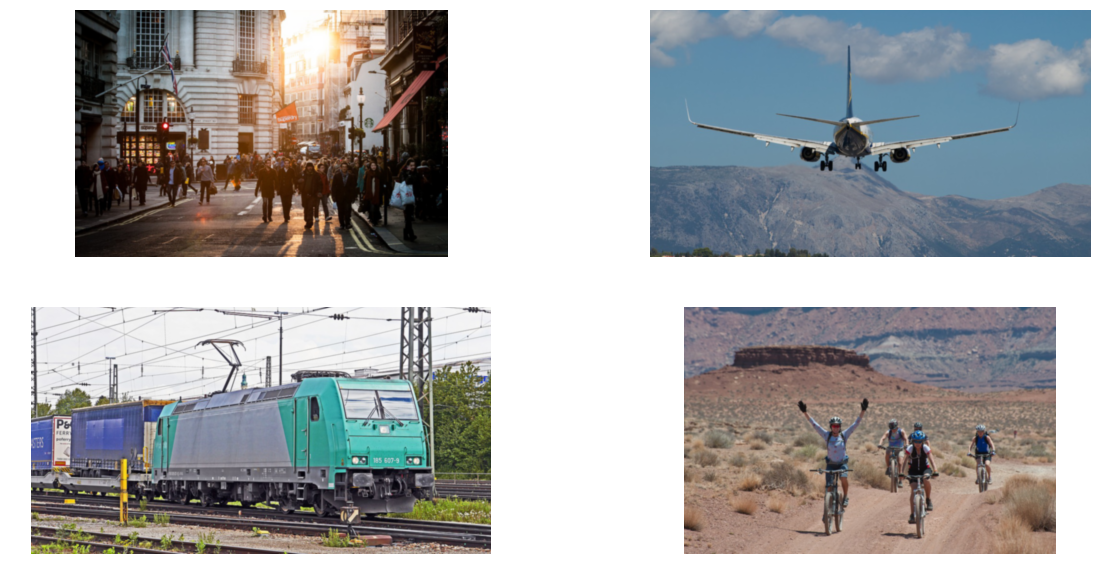

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# This is the same array of image filenames we'll read for the caption
# generation step
images = ['urban.jpg', 'plane.jpg', 'train.jpg', 'bikes.jpg']

f, axarr = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
for index, image in enumerate(images):
  axarr[index//2][index%2].imshow(Image.open(image), interpolation="bicubic")
  axarr[index//2][index%2].grid(False)
  axarr[index//2][index%2].axis('off')

## Load Our Dependencies and Model

In [0]:
import math
import os

import tensorflow as tf

from im2txt import configuration
from im2txt import inference_wrapper
from im2txt.inference_utils import caption_generator
from im2txt.inference_utils import vocabulary

In [0]:
# Build the inference graph.
g = tf.Graph()
with g.as_default():
  model = inference_wrapper.InferenceWrapper()
  restore_fn = model.build_graph_from_config(configuration.ModelConfig(),
                                             checkpoint_path)
g.finalize()

# Create the vocabulary.
vocab = vocabulary.Vocabulary(vocab_file)

## Create Some Captions for our Images!

INFO:tensorflow:Loading model from checkpoint: model/model.ckpt-2000000
INFO:tensorflow:Restoring parameters from model/model.ckpt-2000000
INFO:tensorflow:Successfully loaded checkpoint: model.ckpt-2000000


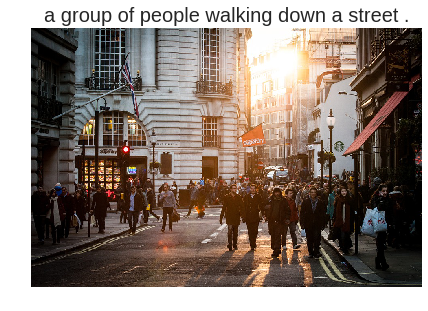

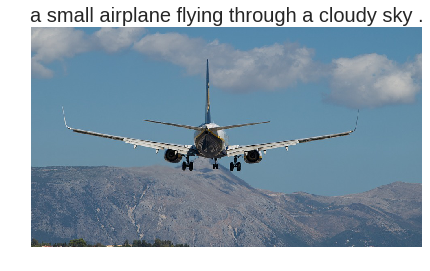

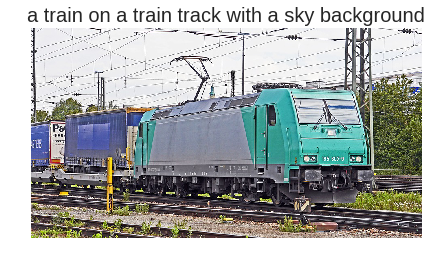

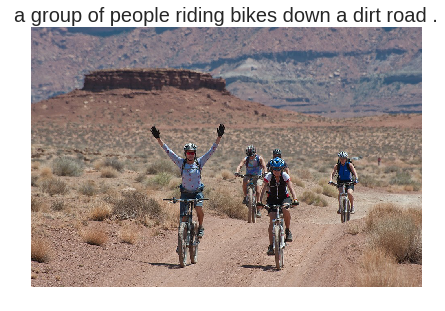

In [10]:
with tf.Session(graph=g) as sess:
  # Load the model from checkpoint.
  restore_fn(sess)

  # Prepare the caption generator. Here we are implicitly using the default
  # beam search parameters. See caption_generator.py for a description of the
  # available beam search parameters.
  generator = caption_generator.CaptionGenerator(model, vocab)

  for filename in images:
    with tf.gfile.GFile(filename, "rb") as f:
      image = f.read()
    captions = generator.beam_search(sess, image)
    
    # Just take the first caption and display it
    caption = captions[0]
    sentence = [vocab.id_to_word(w) for w in caption.sentence[1:-1]]
    sentence = " ".join(sentence)
    
    plt.figure(figsize=(7,7))
    plt.imshow(Image.open(filename))
    plt.grid(False)
    plt.axis('off')
    plt.title(sentence, fontsize=20)
    plt.show()
        

# References

## Show and Tell: A Neural Image Caption Generator

"Show and Tell: Lessons learned from the 2015 MSCOCO Image Captioning Challenge."

Oriol Vinyals, Alexander Toshev, Samy Bengio, Dumitru Erhan.

IEEE transactions on pattern analysis and machine intelligence (2016).

Full text available at: http://arxiv.org/abs/1609.06647

## Code
https://github.com/tensorflow/models/tree/master/research/im2txt

## Pretrained Weights

https://github.com/KranthiGV/Pretrained-Show-and-Tell-model
